In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
import numpy as np
import pickle

In [4]:
tokenizer = Tokenizer()

data = open(r"C:\Users\kjson\Downloads\irish-lyrics-eof.txt").read()

#corpus data normalized -> lower, split into string by new line characters
c_data = data.lower().split("\n")

#fit the corpus data to toke
tokenizer.fit_on_texts(c_data)

# Save the tokenizer using pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

#observe that we no longer use OOV instead we use +1
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [3]:
input_sequences = []

for line in c_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequences = token_list[:i+1]
        input_sequences.append(n_gram_sequences)
        
# pad sequences
max_sequences_len = max ([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequences_len,
                                         padding= 'pre'))

In [4]:
#create predictors and label

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes= total_words)

In [10]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [11]:
print (xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [12]:
print (ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [13]:
print (xs[5])
print (ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [5]:
print (tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequences_len-1))
model.add(Bidirectional(LSTM(256)))  # Remove return_sequences=True
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=["accuracy"])


In [24]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_10 (Bidirecti  (None, 512)              731136    
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 2690)              1379970   
                                                                 
Total params: 2,380,106
Trainable params: 2,380,106
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Define the EarlyStopping and ModelCheckpoint callbacks
earlystop = EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("model_checkpoint.h5",
                             monitor="loss",
                             verbose=1,
                             save_best_only=True,
                             mode="min")

# Train the model with the EarlyStopping and ModelCheckpoint callbacks
history = model.fit(xs, ys, epochs=1000, verbose=1, callbacks=[earlystop, checkpoint])


Epoch 1/1000
377/377 [==============================] - ETA: 0s - loss: 6.6971 - accuracy: 0.0642
Epoch 1: loss improved from inf to 6.69708, saving model to model_checkpoint.h5
377/377 [==============================] - 51s 120ms/step - loss: 6.6971 - accuracy: 0.0642
Epoch 2/1000
377/377 [==============================] - ETA: 0s - loss: 6.2497 - accuracy: 0.0754
Epoch 2: loss improved from 6.69708 to 6.24973, saving model to model_checkpoint.h5
377/377 [==============================] - 47s 125ms/step - loss: 6.2497 - accuracy: 0.0754
Epoch 3/1000
377/377 [==============================] - ETA: 0s - loss: 5.9841 - accuracy: 0.0851
Epoch 3: loss improved from 6.24973 to 5.98411, saving model to model_checkpoint.h5
377/377 [==============================] - 49s 131ms/step - loss: 5.9841 - accuracy: 0.0851
Epoch 4/1000
377/377 [==============================] - ETA: 0s - loss: 5.6811 - accuracy: 0.1008
Epoch 4: loss improved from 5.98411 to 5.68111, saving model to model_checkpoint.h5


In [26]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot (history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

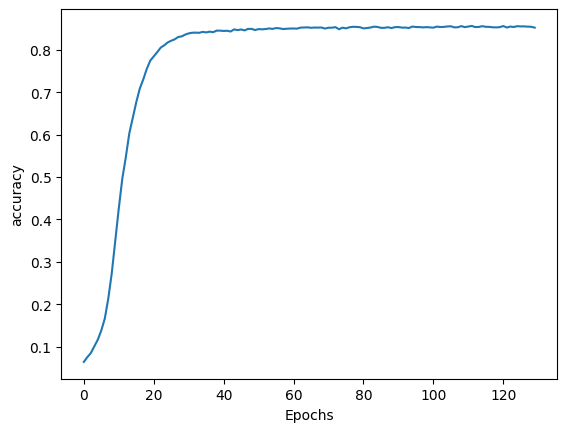

In [27]:
plot_graphs(history, 'accuracy')

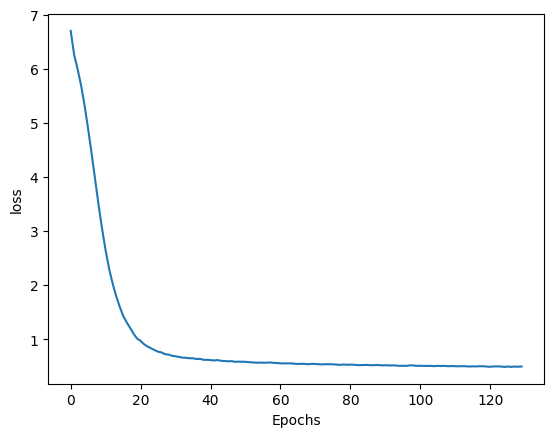

In [28]:
plot_graphs(history, 'loss')

In [30]:
seed_text= "I've got a good feeling about this"
next_words = 20

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequences_len - 1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    
    seed_text += " " + output_word

print(seed_text)


1/1 [==============================] - 0s 24ms/step
I've got a good feeling about this fell on your lip and they easy down the girl of the wind majestic shannon shannon they trudged side down


In [31]:
# LSTM Model 


from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
lstm_model = Sequential()
lstm_model.add(Embedding(total_words, 100, input_length=max_sequences_len-1))
lstm_model.add(LSTM(256))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(total_words, activation='softmax'))

adam = Adam(learning_rate=0.001)
lstm_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=["accuracy"])

lstm_model.summary()

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Define the EarlyStopping and ModelCheckpoint callbacks
earlystop = EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("lstm_model_checkpoint.h5",
                             monitor="loss",
                             verbose=1,
                             save_best_only=True,
                             mode="min")

# Train the model with the EarlyStopping and ModelCheckpoint callbacks
lstm_history = lstm_model.fit(xs, ys, epochs=1000, verbose=1, callbacks=[earlystop, checkpoint])


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 15, 100)           269000    
                                                                 
 lstm_11 (LSTM)              (None, 256)               365568    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 2690)              691330    
                                                                 
Total params: 1,325,898
Trainable params: 1,325,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
377/377 [==============================] - ETA: 0s - loss: 6.6876 - accuracy: 0.0639
Epoch 1: loss improved from inf to 6.68759, saving model to lstm_model_checkp

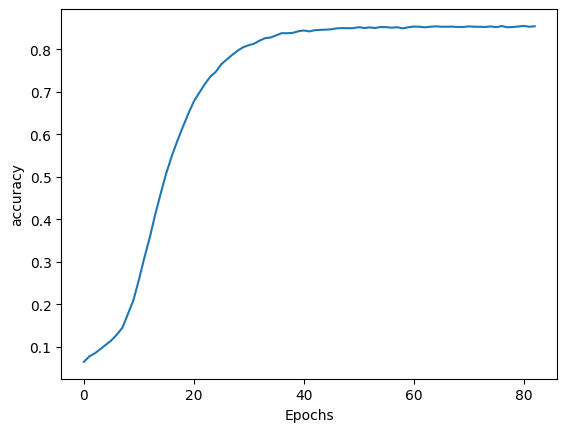

In [32]:
import matplotlib.pyplot as plt

def plot_graphs(lstm_history,string):
    plt.plot (lstm_history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(lstm_history, 'accuracy')

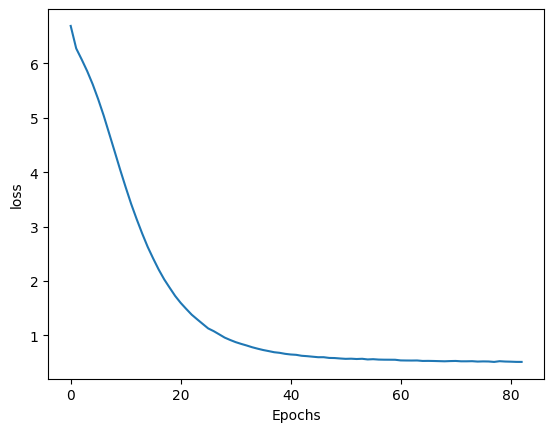

In [33]:
plot_graphs(lstm_history, 'loss')

In [34]:
seed_text= "I've got a good feeling about this"
next_words = 20

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequences_len - 1, padding='pre')
    predicted = np.argmax(lstm_model.predict(token_list), axis=1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    
    seed_text += " " + output_word

print(seed_text)


1/1 [==============================] - 0s 111ms/step
I've got a good feeling about this more too more more on young and young away oer the dim weeping dawn turning grey there and more ye


In [35]:
from tensorflow.keras.layers import GRU
gru_model = Sequential()
gru_model.add(Embedding(total_words, 100, input_length=max_sequences_len-1))
gru_model.add(GRU(256))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.001)
gru_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=["accuracy"])
gru_model.summary()

checkpoint = ModelCheckpoint("gru_model_checkpoint.h5",
                             monitor="loss",
                             verbose=1,
                             save_best_only=True,
                             mode="min")

gru_history = gru_model.fit(xs, ys, epochs=1000, verbose=1, callbacks=[earlystop, checkpoint])


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 15, 100)           269000    
                                                                 
 gru (GRU)                   (None, 256)               274944    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 2690)              691330    
                                                                 
Total params: 1,235,274
Trainable params: 1,235,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
376/377 [============================>.] - ETA: 0s - loss: 6.7299 - accuracy: 0.0687
Epoch 1: loss improved from inf to 6.73025, saving model to gru_model_checkpo

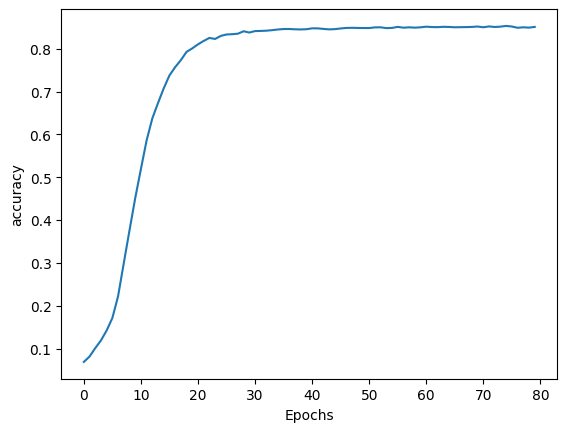

In [36]:
import matplotlib.pyplot as plt

def plot_graphs(gru_history,string):
    plt.plot (gru_history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(gru_history, 'accuracy')

In [37]:
seed_text= "I've got a good feeling about this"
next_words = 20

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequences_len - 1, padding='pre')
    predicted = np.argmax(gru_model.predict(token_list), axis=1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    
    seed_text += " " + output_word

print(seed_text)


1/1 [==============================] - 0s 10ms/step
I've got a good feeling about this across the rocky road to dublin the follol de rah fell on the bright tree to fulfill youll see my


In [2]:
import pickle
from tensorflow.keras.models import load_model

# Load the model checkpoints
model_checkpoint_1 = load_model("model_checkpoint.h5")
lstm_model_checkpoint = load_model("lstm_model_checkpoint.h5")
gru_model_checkpoint = load_model("gru_model_checkpoint.h5")

# Dump the model checkpoints using pickle
with open("model_checkpoint_1.pkl", "wb") as f:
    pickle.dump(model_checkpoint_1, f)

with open("lstm_model_checkpoint.pkl", "wb") as f:
    pickle.dump(lstm_model_checkpoint, f)

with open("gru_model_checkpoint.pkl", "wb") as f:
    pickle.dump(gru_model_checkpoint, f)
